In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Bloco 1 - K-Means tradicional com distância Euclidiana
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
# Bloco 2 - K-Means com distância DTW (tslearn)
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
# Bloco 3 - Hierarchical Clustering com DTW
from scipy.cluster.hierarchy import linkage, fcluster
from tslearn.metrics import cdist_dtw
# Bloco 4 - DBA-KMeans (K-Means com DTW Barycenter Averaging)
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import seaborn as sns

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tslearn.metrics import dtw

C:\Users\Yama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [8]:
df = pd.read_csv('../../data/rafaelDB.csv')
df = df.T

In [9]:
# DataFrame original: df

# 1. Preencher NaNs com a média de cada série (coluna)
df_media = df.copy()
df_media.iloc[1:] = df_media.iloc[1:].apply(lambda col: col.fillna(col.mean()), axis=0)

# 2. Preencher NaNs com a mediana de cada série (coluna)
df_mediana = df.copy()
df_mediana.iloc[1:] = df_mediana.iloc[1:].apply(lambda col: col.fillna(col.median()), axis=0)

C:\Users\Yama\AppData\Local\Temp\ipykernel_19148\4009407484.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', n_clusters)


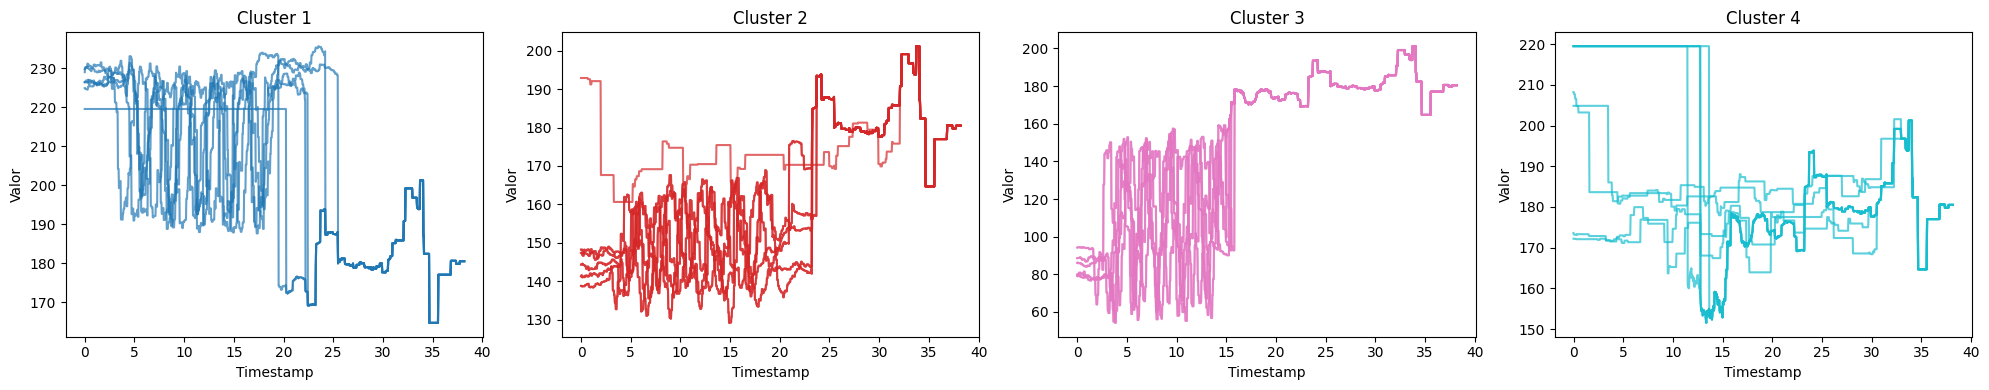

In [11]:
# timestamp (eixo X)
timestamp = df_media.iloc[0].values

# séries temporais (linhas 1 a n)
series = df_media.iloc[1:].values

# Normalizar os dados
#scaler = StandardScaler()
X_scaled = StandardScaler().fit_transform(series)

# Aplicar K-Means
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Criar colormap com n_clusters cores
cmap = cm.get_cmap('tab10', n_clusters)

fig, axes = plt.subplots(1, n_clusters, figsize=(5 * n_clusters, 4), squeeze=False)

for cluster_id in range(n_clusters):
    ax = axes[0][cluster_id]
    indices = np.where(clusters == cluster_id)[0]
    color = cmap(cluster_id)  # cor fixa para o cluster

    for i in indices:
        ax.plot(timestamp, series[i], color=color, alpha=0.7)

    ax.set_title(f'Cluster {cluster_id+1}')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Valor')

plt.tight_layout()
plt.show()

C:\Users\Yama\AppData\Local\Temp\ipykernel_19148\2181180064.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', n_clusters)


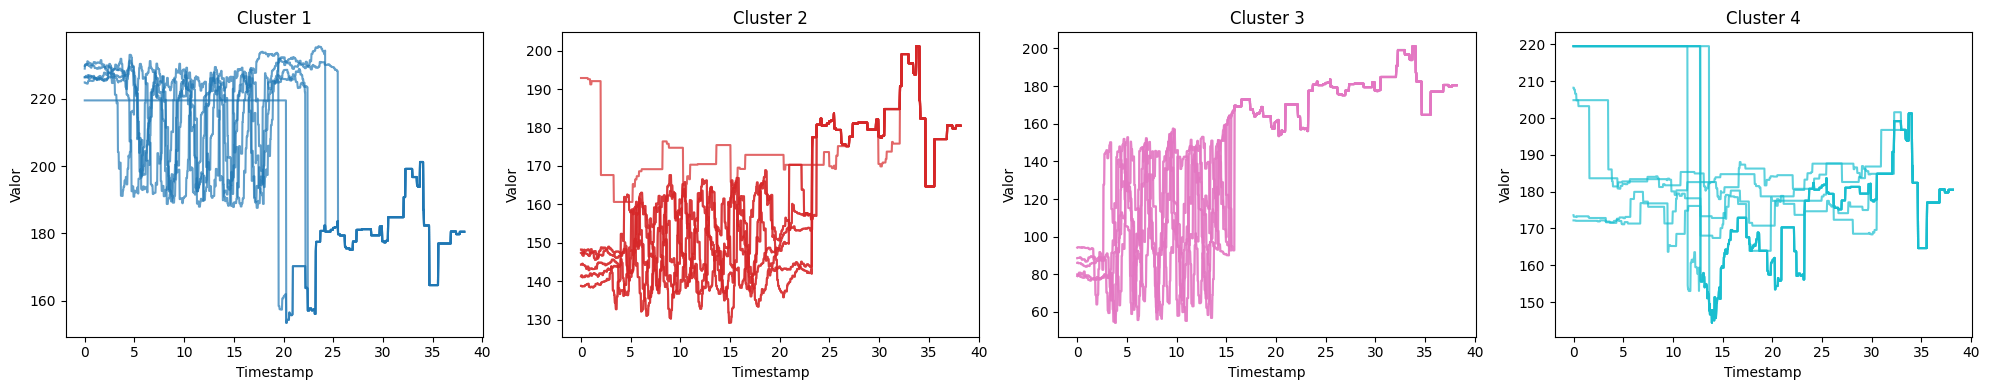

In [12]:
# timestamp (eixo X)
timestamp = df_mediana.iloc[0].values

# séries temporais (linhas 1 a n)
series = df_mediana.iloc[1:].values

# Normalizar os dados
#scaler = StandardScaler()
X_scaled = StandardScaler().fit_transform(series)

# Aplicar K-Means
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Criar colormap com n_clusters cores
cmap = cm.get_cmap('tab10', n_clusters)

fig, axes = plt.subplots(1, n_clusters, figsize=(5 * n_clusters, 4), squeeze=False)

for cluster_id in range(n_clusters):
    ax = axes[0][cluster_id]
    indices = np.where(clusters == cluster_id)[0]
    color = cmap(cluster_id)  # cor fixa para o cluster

    for i in indices:
        ax.plot(timestamp, series[i], color=color, alpha=0.7)

    ax.set_title(f'Cluster {cluster_id+1}')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Valor')

plt.tight_layout()
plt.show()